In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
np.random.seed(1)

In [3]:
def forward(X, W1, b1, W2, b2):
    Z = 1 / (1 + np.exp(-X.dot(W1) - b1))
    A = Z.dot(W2) + b2
    expA = np.exp(A)
    Y = expA / expA.sum(axis=1, keepdims=True)
    return Y, Z

In [4]:
def cost(T, Y):
    dot_T_Y = np.sum(T * np.log(Y), axis = 1)
    return -dot_T_Y.sum()

In [5]:
smooth_para = 0.1

In [6]:
def cost_L1(T, W1, W2, Y):
    dot_T_Y = np.sum(T * np.log(Y), axis = 1)
    return -dot_T_Y.sum() + ((smooth_para/2)*(W1*W1)).sum() + ((smooth_para/2)*(W2*W2)).sum()

In [7]:
def classification_rate(Y, P):
    n_correct = 0
    n_total = 0
    for i in range(len(Y)):
        n_total += 1
        if Y[i] == P[i]:
            n_correct += 1
    return float(n_correct) / n_total

In [8]:
def derivative_w2(Z, T, Y):
    return -Z.T.dot(T - Y)

In [9]:
def derivative_b2(T, Y):
    return (-(T - Y)).sum(axis=0)

In [10]:
def derivative_w1_sig(X, Z, T, Y, W2):
    dZ = (T - Y).dot(W2.T) * Z * ( 1 - Z)
    ret2 = X.T.dot(dZ)
    return -ret2

In [11]:
def derivative_b1_sig(T, Y, W2, Z):
    return (-(T - Y).dot(W2.T) * Z * (1-Z)).sum(axis=0)

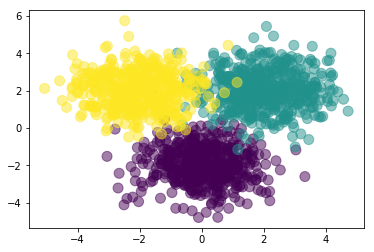

In [12]:
# create the data
Nclass = 500
D = 2 # dimensionality of input
M = 3 # hidden layer size
K = 3 # number of classes

X1 = np.random.randn(Nclass, D) + np.array([0, -2])
X2 = np.random.randn(Nclass, D) + np.array([2, 2])
X3 = np.random.randn(Nclass, D) + np.array([-2, 2])
X = np.vstack([X1, X2, X3])

Y = np.array([0]*Nclass + [1]*Nclass + [2]*Nclass)
N = len(Y)
# turn Y into an indicator matrix for training
T = np.zeros((N, K))
for i in range(N):
    T[i, Y[i]] = 1

# let's see what it looks like
plt.scatter(X[:,0], X[:,1], c=Y, s=100, alpha=0.5)
plt.show()

# randomly initialize weights
w1 = np.random.randn(D, M)
b1 = np.random.randn(M)
w2 = np.random.randn(M, K)
b2 = np.random.randn(K)

In [13]:
# randomly initialize weights
w1 = np.random.randn(D, M)
B1 = np.random.randn(M)
w2 = np.random.randn(M, K)
B2 = np.random.randn(K)

cost: 5194.384989687937 classification_rate: 0.3333333333333333
cost: 172.0012340621138 classification_rate: 0.9706666666666667
cost: 143.7684079657173 classification_rate: 0.9726666666666667
cost: 134.22392892949662 classification_rate: 0.9733333333333334
cost: 129.0188225329082 classification_rate: 0.9726666666666667
cost: 125.35440443867006 classification_rate: 0.972
cost: 122.44667422452588 classification_rate: 0.972
cost: 120.08148076108982 classification_rate: 0.972
cost: 118.2255252462133 classification_rate: 0.972
cost: 116.84625892493905 classification_rate: 0.9713333333333334


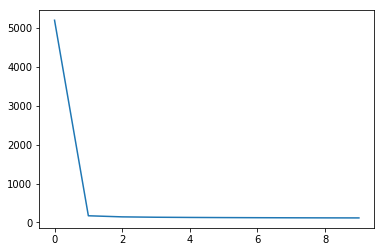

In [14]:
W1 = w1.copy()
b1 = B1.copy()
W2 = w2.copy()
b2 = B2.copy()

learning_rate = 1e-3

costs_sig = []
for epoch in range(1000):
    output, hidden = forward(X, W1, b1, W2, b2)
    if epoch % 100 == 0:
        c = cost(T, output)
        P = np.argmax(output, axis=1)
        r = classification_rate(Y, P)
        print("cost:", c, "classification_rate:", r)
        costs_sig.append(c)

    W2 -= learning_rate * derivative_w2(hidden, T, output)
    b2 -= learning_rate * derivative_b2(T, output)
    W1 -= learning_rate * derivative_w1_sig(X, hidden, T, output, W2)
    b1 -= learning_rate * derivative_b1_sig(T, output, W2, hidden)
    
plt.plot(costs_sig)
plt.show()

cost: 5194.384989687937 classification_rate: 0.3333333333333333
cost: 280.21382402060897 classification_rate: 0.966
cost: 225.4728372011033 classification_rate: 0.966
cost: 202.4797492816245 classification_rate: 0.9673333333333334
cost: 189.17737542752326 classification_rate: 0.9673333333333334
cost: 180.27426136857997 classification_rate: 0.9673333333333334
cost: 173.79118958867048 classification_rate: 0.968
cost: 168.80292295382085 classification_rate: 0.9686666666666667
cost: 164.8130530111608 classification_rate: 0.9686666666666667
cost: 161.52880678682124 classification_rate: 0.9686666666666667


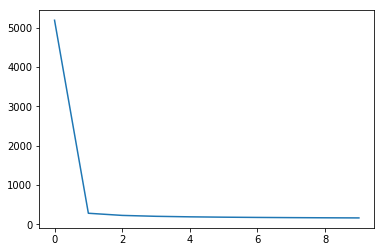

In [15]:
#variable learning rate

W1 = w1.copy()
b1 = B1.copy()
W2 = w2.copy()
b2 = B2.copy()

#initial learning rate
lr = .002

costs_var = []
for epoch in range(1000):
    output, hidden = forward(X, W1, b1, W2, b2)
    if epoch % 100 == 0:
        c = cost(T, output)
        P = np.argmax(output, axis=1)
        r = classification_rate(Y, P)
        print("cost:", c, "classification_rate:", r)
        costs_var.append(c)

    W2 -= lr/np.sqrt(epoch +1) * derivative_w2(hidden, T, output)
    b2 -= lr/np.sqrt(epoch +1) * derivative_b2(T, output)
    W1 -= lr/np.sqrt(epoch +1 ) * derivative_w1_sig(X, hidden, T, output, W2)
    b1 -= lr/np.sqrt(epoch +1) * derivative_b1_sig(T, output, W2, hidden)
    
plt.plot(costs_var)
plt.show()

cost: 5194.384989687937 classification_rate: 0.3333333333333333
cost: 5085.6580727299915 classification_rate: 0.3333333333333333
cost: 5037.611973737583 classification_rate: 0.3333333333333333
cost: 5000.858028483715 classification_rate: 0.3333333333333333
cost: 4969.961637628533 classification_rate: 0.3333333333333333
cost: 4942.813048231272 classification_rate: 0.3333333333333333
cost: 4918.329059029046 classification_rate: 0.3333333333333333
cost: 4895.86574173653 classification_rate: 0.3333333333333333
cost: 4875.003321922552 classification_rate: 0.3333333333333333
cost: 4855.450101278804 classification_rate: 0.3333333333333333


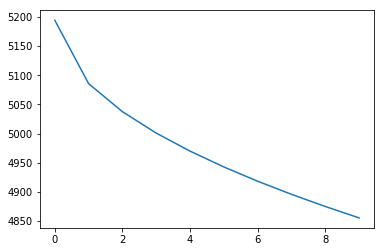

In [21]:
# adaGrad means adaptive learning rate 


W1 = w1.copy()
b1 = B1.copy()
W2 = w2.copy()
b2 = B2.copy()

learning_rate = 1e-3
decay = 0.999
epsilon = 0.00001
cW2 = 1
cb2 = 1
cW1 = 1
cb1 = 1

costs_AdaGrad = []
for epoch in range(1000):
    output, hidden = forward(X, W1, b1, W2, b2)
    if epoch % 100 == 0:
        c = cost(T, output)
        P = np.argmax(output, axis=1)
        r = classification_rate(Y, P)
        print("cost:", c, "classification_rate:", r)
        costs_AdaGrad.append(c)

        
    #gradients
    gW2 = derivative_w2(hidden, T, output) 
    gb2 = derivative_b2(T, output)
    gW1 = derivative_w1_sig(X, hidden, T, output, W2)
    gb1 = derivative_b1_sig(T, output, W2, hidden)
                                            
    cW2 = cW2 + gW2 * gW2
    cb2 = cb2 + gb2 * gb2
    cW1 = cW1 + gW1 * gW1
    cb1 = cb1 + gb1 * gb1
                                            
    W2 -= learning_rate * gW2/(np.sqrt(cW2) + epsilon)
    b2 -= learning_rate * gb2/(np.sqrt(cb2) + epsilon)
    W1 -= learning_rate * gW1/(np.sqrt(cW1) + epsilon)
    b1 -= learning_rate * gb2/(np.sqrt(cb2) + epsilon)
    
plt.plot(costs_AdaGrad)
plt.show()


cost: 5194.384989687937 classification_rate: 0.3333333333333333
cost: 2395.138875608854 classification_rate: 0.3333333333333333
cost: 1568.526308484567 classification_rate: 0.606
cost: 1195.004119106593 classification_rate: 0.6533333333333333
cost: 1011.7337329293614 classification_rate: 0.89
cost: 901.0338694380639 classification_rate: 0.9573333333333334
cost: 821.2375787607906 classification_rate: 0.9646666666666667
cost: 757.5542859917066 classification_rate: 0.968
cost: 703.9909516931197 classification_rate: 0.968
cost: 657.6356885792634 classification_rate: 0.968


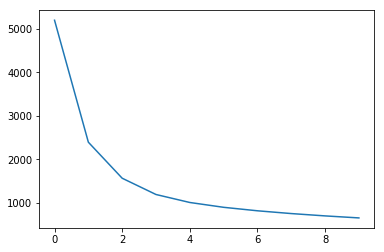

In [22]:
# RMS prop is to prevent cache grows too fast, so we add decay rate.  

W1 = w1.copy()
b1 = B1.copy()
W2 = w2.copy()
b2 = B2.copy()

learning_rate = 1e-3
decay = 0.999
epsilon = 0.00001
cW2 = 0
cb2 = 0
cW1 = 0
cb1 = 0

costs_RMS = []
for epoch in range(1000):
    output, hidden = forward(X, W1, b1, W2, b2)
    if epoch % 100 == 0:
        c = cost(T, output)
        P = np.argmax(output, axis=1)
        r = classification_rate(Y, P)
        print("cost:", c, "classification_rate:", r)
        costs_RMS.append(c)

        
    #gradients
    gW2 = derivative_w2(hidden, T, output) 
    gb2 = derivative_b2(T, output)    
    gW1 = derivative_w1_sig(X, hidden, T, output, W2) 
    gb1 = derivative_b1_sig(T, output, W2, hidden) 
                                            
    cW2 = decay * cW2 + (1 - decay) * gW2 * gW2
    cb2 = decay * cb2 + (1 - decay) * gb2 * gb2
    cW1 = decay * cW1 + (1 - decay) * gW1 * gW1
    cb1 = decay * cb1 + (1 - decay) * gb1 * gb1
                                            
    W2 -= learning_rate * gW2/(np.sqrt(cW2) + epsilon)
    b2 -= learning_rate * gb2/(np.sqrt(cb2) + epsilon)
    W1 -= learning_rate * gW1/(np.sqrt(cW1) + epsilon)
    b1 -= learning_rate * gb2/(np.sqrt(cb2) + epsilon)
    
plt.plot(costs_RMS)
plt.show()

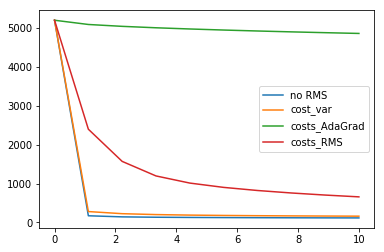

In [23]:
x0 = np.linspace(0, 10, len(costs_sig))
plt.plot(x0, costs_sig, label="no RMS")
x1 = np.linspace(0, 10, len(costs_var))
plt.plot(x1, costs_var, label="cost_var")
x2 = np.linspace(0, 10, len(costs_AdaGrad))
plt.plot(x2, costs_AdaGrad, label="costs_AdaGrad")
x3 = np.linspace(0, 10, len(costs_RMS))
plt.plot(x3, costs_RMS, label="costs_RMS")
plt.legend()
plt.show()